<table style="float:left; border:none">
   <tr style="border:none">
       <td style="border:none">
           <a href="http://bokeh.pydata.org/">     
           <img 
               src="http://bokeh.pydata.org/en/latest/_static/bokeh-transparent.png" 
               style="width:70px"
           >
           </a>    
       </td>
       <td style="border:none">
           <h1>Bokeh Tutorial &mdash; Adding Interactions</h1>
       </td>
   </tr>
</table>

In [9]:
from bokeh.io import output_notebook, show


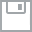
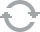
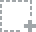
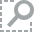
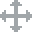
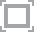
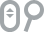
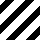
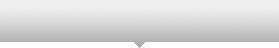
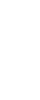
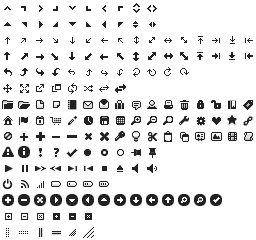
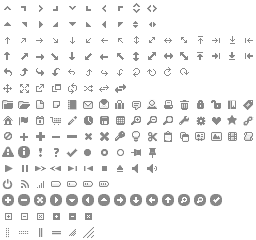
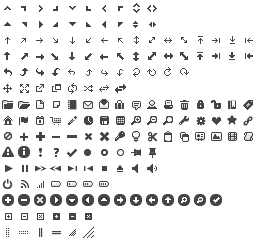
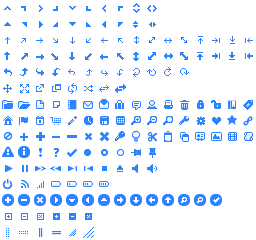
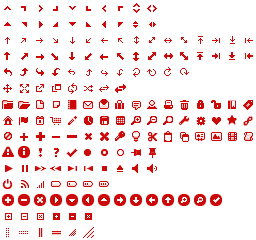
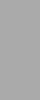
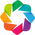
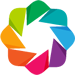

In [10]:
output_notebook()

# Simple Layouts

In order to add widgets or have multiple plots that are linked together, you must first be able to create documents that contain these separate objects. It is possible to accomplish this in your own custom templates using ``bokeh.embed.components``. But, Bokeh also provides simple layout capability for grid plots, vplots, and hplots (than can be nested). 

An example using ``gridplot`` is shown below:

In [11]:
from bokeh.plotting import figure
from bokeh.io import gridplot

x = list(range(11))
y0, y1, y2 = x, [10-i for i in x], [abs(i-5) for i in x]

# create a new plot
s1 = figure(width=250, plot_height=250)
s1.circle(x, y0, size=10, color="navy", alpha=0.5)

# create another one
s2 = figure(width=250, height=250)
s2.triangle(x, y1, size=10, color="firebrick", alpha=0.5)

# create and another
s3 = figure(width=250, height=250)
s3.square(x, y2, size=10, color="olive", alpha=0.5)

# put all the plots in an HBox
p = gridplot([[s1, s2, s3]], toolbar_location=None)

# show the results
show(p)

In [ ]:
# EXERCISE: create a gridplot of your own



Bokeh also provides the ``vplot`` and ``hplot`` functions to arrange plot objects in vertical or horizontal layouts. 

In [ ]:
# EXERCISE: use vplot to arrange a few plots vertically



# Linked Interactions

It is possible to link various interactions between different Bokeh plots. For instance, the ranges of two (or more) plots can be linked, so that when one of the plots is panned (or zoomed, or otherwise has its range changed) the other plots will update in unison. It is also possible to link selections between two plots, so that when items are selected on one plot, the corresponding items on the second plot also become selected. 

## Linked panning

Linked panning (when mulitple plots have ranges that stay in sync) is simple to spell with Bokeh. You simply share the approrpate range objects between two (or more) plots. The example below shows how to accomplish this by linking the ranges of three plots in various ways:

In [12]:
plot_options = dict(width=250, plot_height=250, title=None, tools='pan')

# create a new plot
s1 = figure(**plot_options)
s1.circle(x, y0, size=10, color="navy")

# create a new plot and share both ranges
s2 = figure(x_range=s1.x_range, y_range=s1.y_range, **plot_options)
s2.triangle(x, y1, size=10, color="firebrick")

# create a new plot and share only one range
s3 = figure(x_range=s1.x_range, **plot_options)
s3.square(x, y2, size=10, color="olive")

p = gridplot([[s1, s2, s3]])

# show the results
show(p)

In [ ]:
# EXERCISE: create two plots in a gridplot, and link their ranges



## Linked brushing

Linking selections is accomplished in a similar way, by sharing data sources between plots. Note that normally with ``bokeh.plotting`` and ``bokeh.charts`` creating a default data source for simple plots is handled automatically. However to share a data source, we must create them by hand and pass them explicitly. This is illustrated in the example below:

In [13]:
from bokeh.models import ColumnDataSource

x = list(range(-20, 21))
y0, y1 = [abs(xx) for xx in x], [xx**2 for xx in x]

# create a column data source for the plots to share
source = ColumnDataSource(data=dict(x=x, y0=y0, y1=y1))

TOOLS = "box_select,lasso_select,help"

# create a new plot and add a renderer
left = figure(tools=TOOLS, width=300, height=300)
left.circle('x', 'y0', source=source)

# create another new plot and add a renderer
right = figure(tools=TOOLS, width=300, height=300)
right.circle('x', 'y1', source=source)

p = gridplot([[left, right]])

show(p)

In [ ]:
# EXERCISE: create two plots in a gridplot, and link their data sources



# Hover Tools

Bokeh has a Hover Tool that allows additional information to be displayed in a popup whenever the uer howevers over a specific glyph. Basic hover tool configuration amounts to providing a list of ``(name, format)`` tuples. The full details can be found in the User's Guide [here](http://bokeh.pydata.org/en/latest/docs/user_guide/tools.html#hover-tool).

The example below shows some basic usage of the Hover tool with a circle glyph:

In [14]:
from bokeh.models import HoverTool

source = ColumnDataSource(
        data=dict(
            x=[1, 2, 3, 4, 5],
            y=[2, 5, 8, 2, 7],
            desc=['A', 'b', 'C', 'd', 'E'],
        )
    )

hover = HoverTool(
        tooltips=[
            ("index", "$index"),
            ("(x,y)", "($x, $y)"),
            ("desc", "@desc"),
        ]
    )

p = figure(plot_width=300, plot_height=300, tools=[hover], title="Mouse over the dots")

p.circle('x', 'y', size=20, source=source)

# Also show custom hover 
from utils import get_custom_hover

show(gridplot([[p, get_custom_hover()]]))

# Ipython Interactors

It is possible to use native IPython notebook interactors together with Bokeh. In the interactor update function, the ``push_notebook`` method can be used to update a data source (presumably based on the iteractor widget values) to cause a plot to update.

**Warning**: The current implementation of ``push_notebook`` leaks memory. It is suitable for interactive exploration but not for long-running or streaming use cases. The problem will be resolved in future releases.

The example below shows a "trig function" exporer using IPython interactors:

In [15]:
import numpy as np
from bokeh.models import Line

x = np.linspace(0, 2*np.pi, 2000)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

p = figure(title="simple line example", plot_height=300, plot_width=600, y_range=(-5, 5))
p.line(x, y, color="#2222aa", alpha=0.5, line_width=2, source=source, name="foo")

def update(f, w=1, A=1, phi=0):
    if   f == "sin": func = np.sin
    elif f == "cos": func = np.cos
    elif f == "tan": func = np.tan
    source.data['y'] = A * func(w * x + phi)
    source.push_notebook()

show(p)

In [16]:
from ipywidgets import interact
interact(update, f=["sin", "cos", "tan"], w=(0,10, 0.1), A=(0,5, 0.1), phi=(0, 10, 0.1))

<function __main__.update>

# Widgets

Bokeh supports direct integration with a small basic widget set. Thse can be used in conjunction with a Bokeh Server, or with ``CustomJS`` models to add more interactive capability to your documents. You can see a complete list, with example code in the [Adding Widgets](http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#adding-widgets) section of the User's Guide. 

To use the widgets, include them in a layout like you would a plot object:

In [17]:
from bokeh.models.widgets import Slider
from bokeh.io import vform

slider = Slider(start=0, end=10, value=1, step=.1, title="foo")

show(vform(slider))

In [ ]:
# EXERCISE: create and show a Select widget 


# Callbacks

In [18]:
from bokeh.models import TapTool, CustomJS, ColumnDataSource

callback = CustomJS(code="alert('hello world')")
tap = TapTool(callback=callback)

p = figure(plot_width=600, plot_height=300, tools=[tap])

p.circle('x', 'y', size=20, source=ColumnDataSource(data=dict(x=[1, 2, 3, 4, 5], y=[2, 5, 8, 2, 7])))

show(p)

## Lots of places to add callbacks

* Widgets - Button, Toggle, Dropdown, TextInput, AutocompleteInput, Select, Multiselect, Slider, (DateRangeSlider), DatePicker,
* Tools - TapTool, BoxSelectTool, HoverTool,
* Selection - ColumnDataSource, AjaxDataSource, BlazeDataSource, ServerDataSource
* Ranges - Range1d, DataRange1d, FactorRange


## Callbacks for widgets

Widgets that have values associated can have small JavaScript actions attached to them. These actions (also referred to as "callbacks") are executed whenever the widget's value is changed. In order to make it easier to refer to specific Bokeh models (e.g., a data source, or a glyhph) from JavaScript, the ``CustomJS`` obejct also accepts a dictionary of "args" that map names to Python Bokeh models. The corresponding JavaScript models are made available automaticaly to the ``CustomJS`` code. 

And example below shows an action attached to a slider that updates a data source whenever the slider is moved:

In [19]:
from bokeh.io import vform
from bokeh.models import CustomJS, ColumnDataSource, Slider

x = [x*0.005 for x in range(0, 200)]
y = x

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

callback = CustomJS(args=dict(source=source), code="""
    var data = source.get('data');
    var f = cb_obj.get('value')
    x = data['x']
    y = data['y']
    for (i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }
    source.trigger('change');
""")

slider = Slider(start=0.1, end=4, value=1, step=.1, title="power", callback=callback)

layout = vform(slider, plot)

show(layout)

## Calbacks for selections

It's also possible to make JavaScript actions that execute whenever a user selection (e.g., box, point, lasso) changes. This is done by attaching the same kind of CustomJS object to whatever data source the selection is made on.

The example below is a bit more sophisticaed, and demonstrates updating one glyphs data source in response to another glyph's selection: 

In [20]:
from random import random

x = [random() for x in range(500)]
y = [random() for y in range(500)]
color = ["navy"] * len(x)

s = ColumnDataSource(data=dict(x=x, y=y, color=color))
p = figure(plot_width=400, plot_height=400, tools="lasso_select", title="Select Here")
p.circle('x', 'y', color='color', size=8, source=s, alpha=0.4)

s2 = ColumnDataSource(data=dict(ym=[0.5, 0.5]))
p.line(x=[0,1], y='ym', color="orange", line_width=5, alpha=0.6, source=s2)

s.callback = CustomJS(args=dict(s2=s2), code="""
    var inds = cb_obj.get('selected')['1d'].indices;
    var d = cb_obj.get('data');
    var ym = 0
    
    if (inds.length == 0) { return; }
    
    for (i = 0; i < d['color'].length; i++) {
        d['color'][i] = "navy"
    }
    for (i = 0; i < inds.length; i++) {
        d['color'][inds[i]] = "firebrick"
        ym += d['y'][inds[i]]
    }
    
    ym /= inds.length
    s2.get('data')['ym'] = [ym, ym]
    
    cb_obj.trigger('change');
    s2.trigger('change');
""")

show(p)

# More
For more interactions, see the User Guide - http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html